#**Second Hand Car Prediction Price**


Data is available at: https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction

Dataset Understanding: Analyze the "Second Hand Car Price Prediction" dataset from Kaggle, focusing on features like Brand, Model, Year, Fuel Type, etc.

Data Preprocessing:
Outlier Analysis: Identify and handle outliers.
Missing Data Analysis: Check for missing values and apply imputation or removal.

Feature Engineering:
Create new impactful features that might improve prediction accuracy.

Model Building:
Train machine learning models (e.g., Linear Regression, Random Forest, XGBoost).
Evaluate prediction accuracy of each model.

Comparative Analysis:
Compare models based on accuracy to find the best-performing technique.

Visualization:
Plot actual vs. predicted car prices on a scatter plot to understand variation.

###Importing Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppressing warnings for cleaner output
warnings.filterwarnings("ignore")

###Reading and Understanding the data

In [ ]:
# Reading and understanding the data
df = pd.read_csv('cars.csv')  # Loading the dataset
print(df.shape)  # Displaying the shape of the dataset (rows and columns)

(100, 13)


In [ ]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Car_ID,100.0,50.50,2.901149e+01,1.0,25.75,50.5,75.25,100.0
Year,100.0,2018.39,1.171160e+00,2016.0,2017.75,2018.0,2019.00,2021.0
Kilometers_Driven,100.0,28150.00,9.121376e+03,10000.0,22000.00,27000.0,32000.00,60000.0
Mileage,100.0,17.21,3.309902e+00,10.0,15.00,17.0,19.00,25.0
Engine,100.0,1855.23,6.313115e+02,999.0,1462.00,1774.0,2143.00,4951.0
Power,100.0,158.13,7.696814e+01,68.0,103.00,148.0,187.00,396.0
Seats,100.0,5.23,7.501515e-01,4.0,5.00,5.0,5.00,7.0
Price,100.0,1574000.00,1.000265e+06,450000.0,700000.00,1300000.0,2500000.00,4000000.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Brand,100,11,Ford,11
Model,100,58,Mustang,3
Fuel_Type,100,2,Petrol,52
Transmission,100,2,Automatic,57
Owner_Type,100,3,First,44


###Checking for duplicate rows - No duplicates in the data found

In [ ]:
# Checking for duplicate rows
print(df.duplicated().sum())  # Checking the number of duplicate rows in the dataset

0


###Checking for null values - No null values found

In [ ]:
# Checking for null values
print(df.isnull().sum())  # Checking the number of missing (null) values per column

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


###Dropping Car_ID column as it is not needed

In [ ]:
# Dropping unnecessary columns (e.g., Car_ID which is unique for each car)
df.drop(['Car_ID'], axis=1, inplace=True)


In [ ]:
# Identifying numerical and categorical columns
numerical_columns = df.select_dtypes(include=np.number).columns  # Numerical columns
categorical_columns = df.select_dtypes(exclude=np.number).columns  # Categorical columns
print(numerical_columns)  # Displaying the numerical columns
print(categorical_columns)# Displaying the categorical columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')
Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')


###Plotting Frequency Distributions

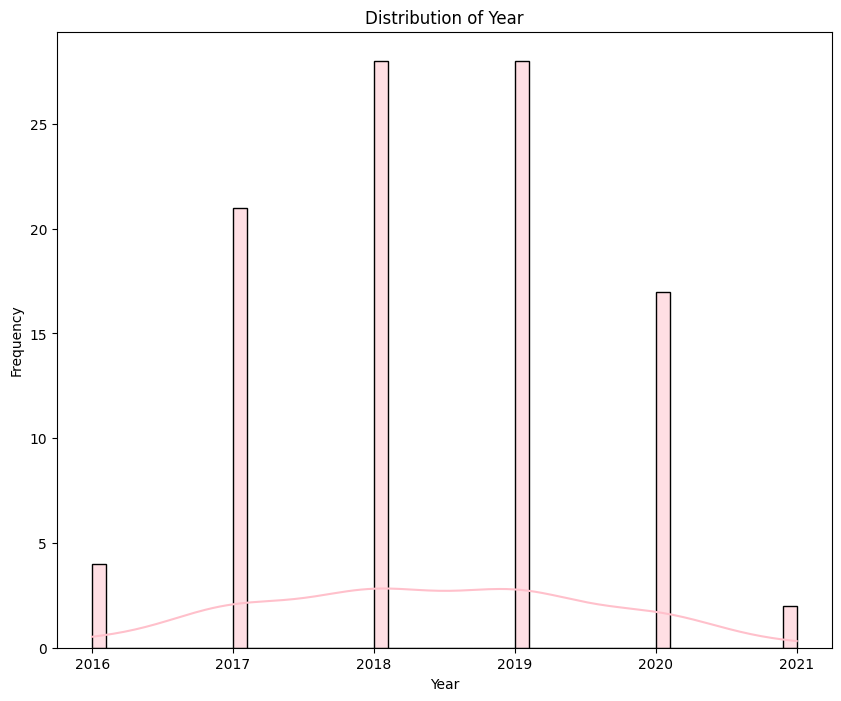

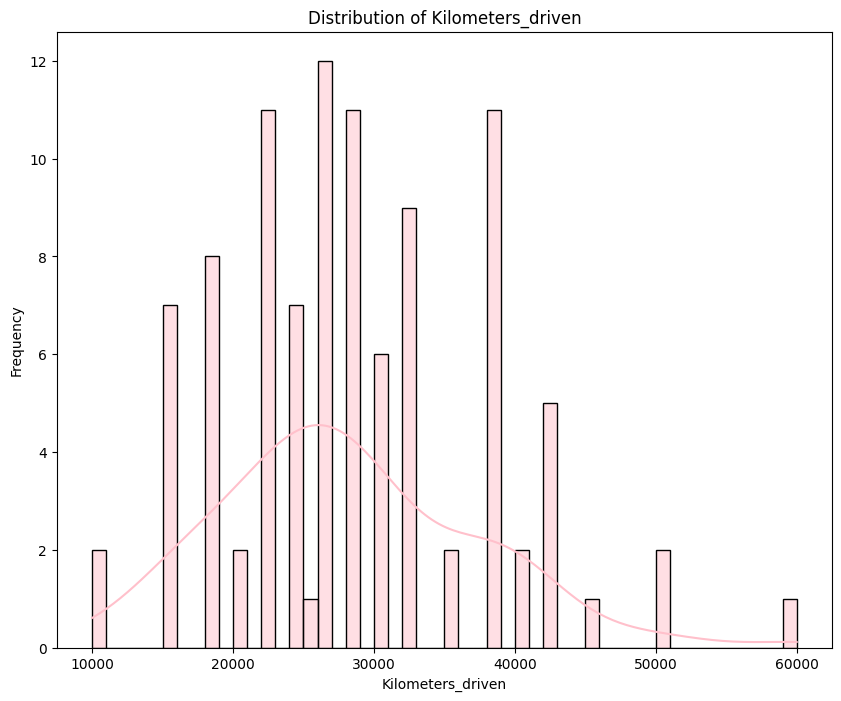

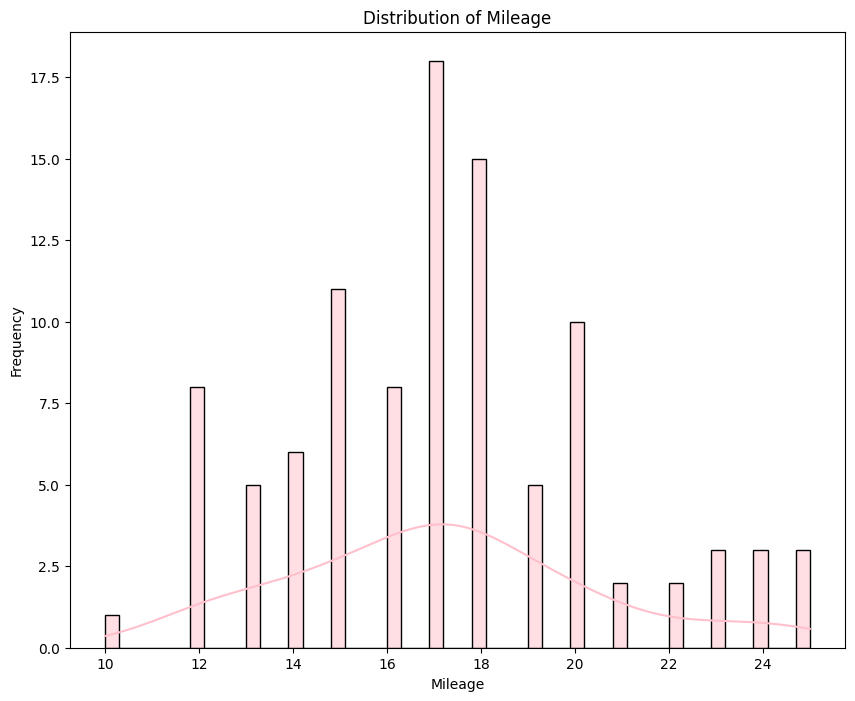

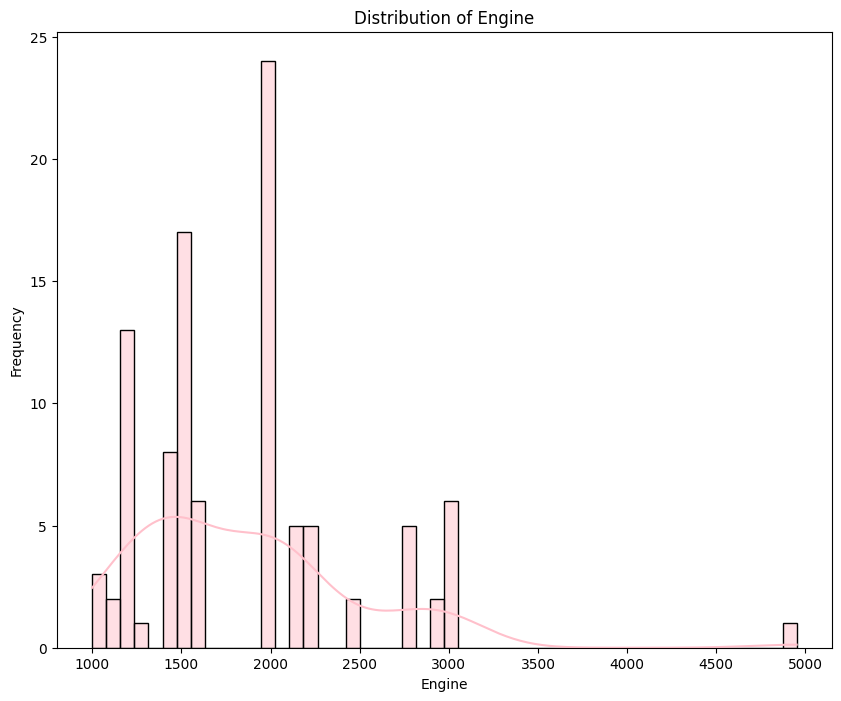

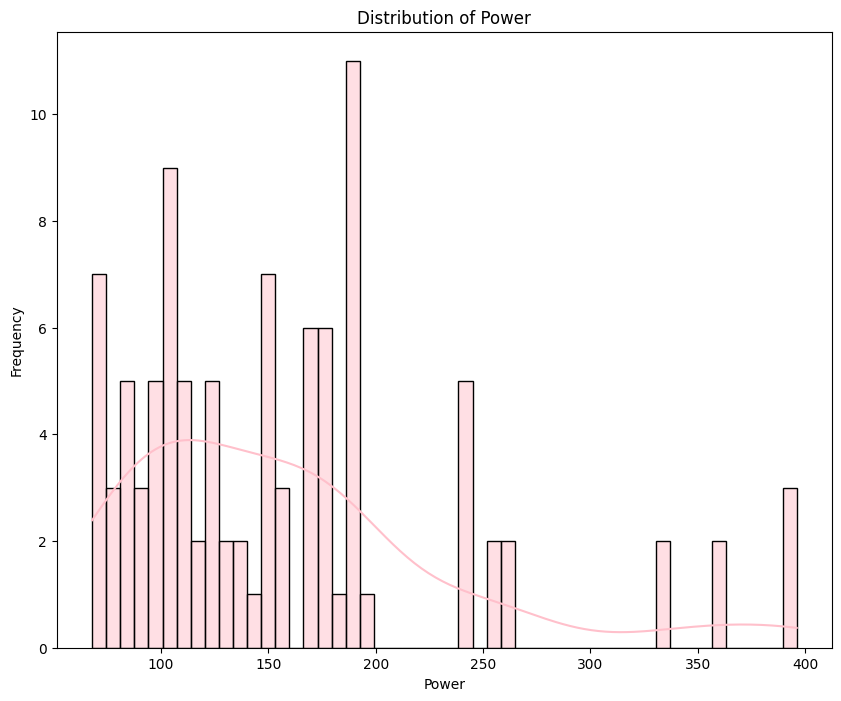

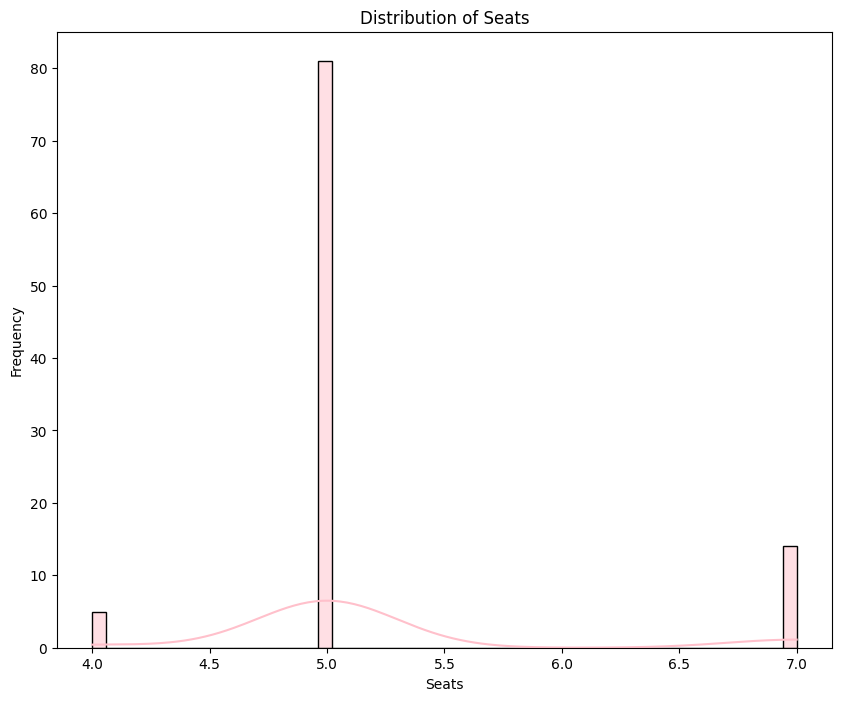

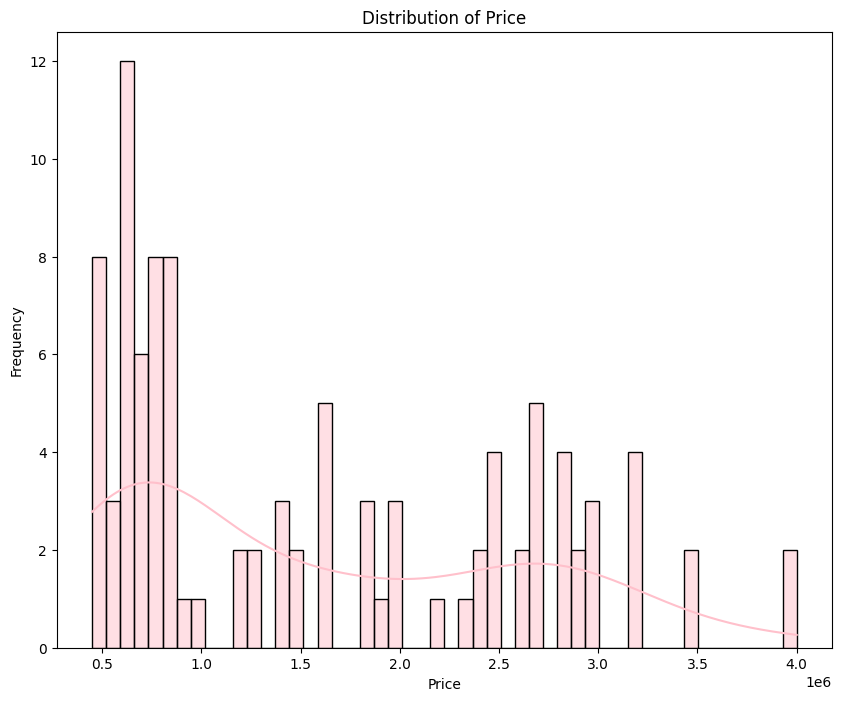

In [ ]:
# Plotting frequency distributions for numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[col], kde=True, color='pink', bins=50)  # Plotting histogram and KDE
    plt.title(f'Distribution of {col.capitalize()}')  # Setting the title of the plot
    plt.xlabel(col.capitalize())  # Setting the x-axis label
    plt.ylabel('Frequency')  # Setting the y-axis label
    plt.show()  # Display the plot

###CountPlots of Categorical Values

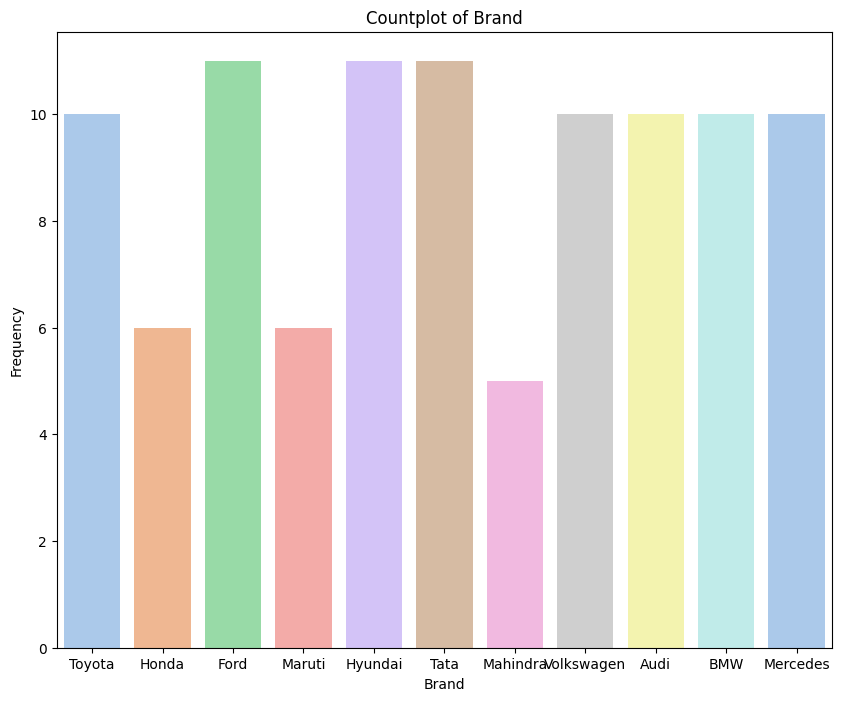

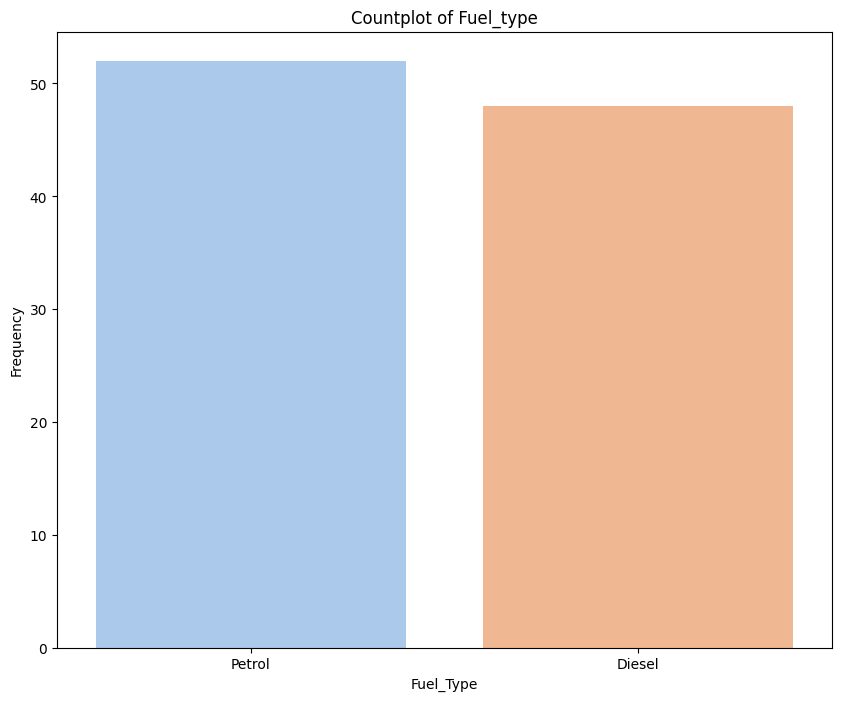

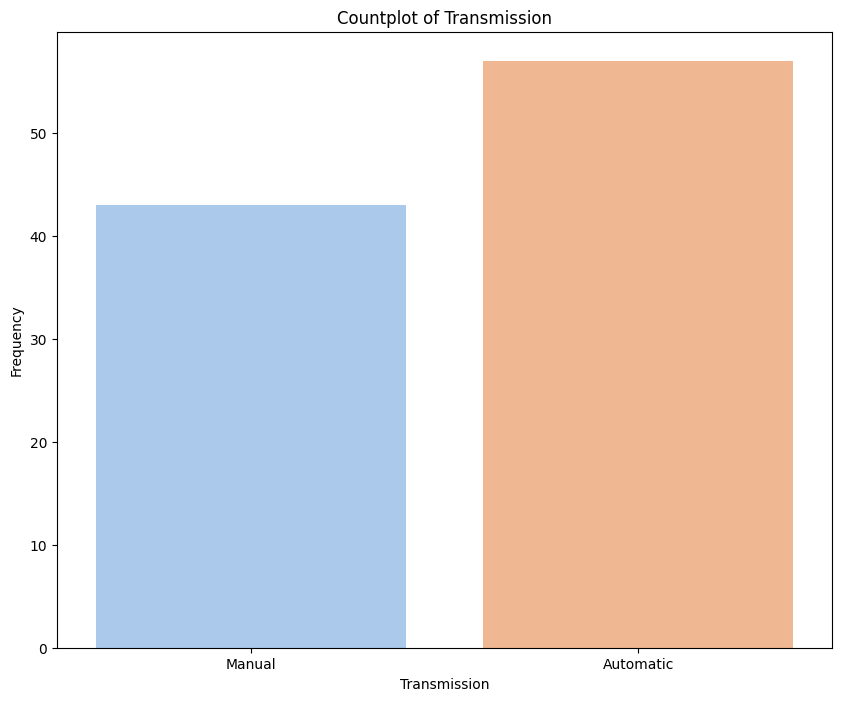

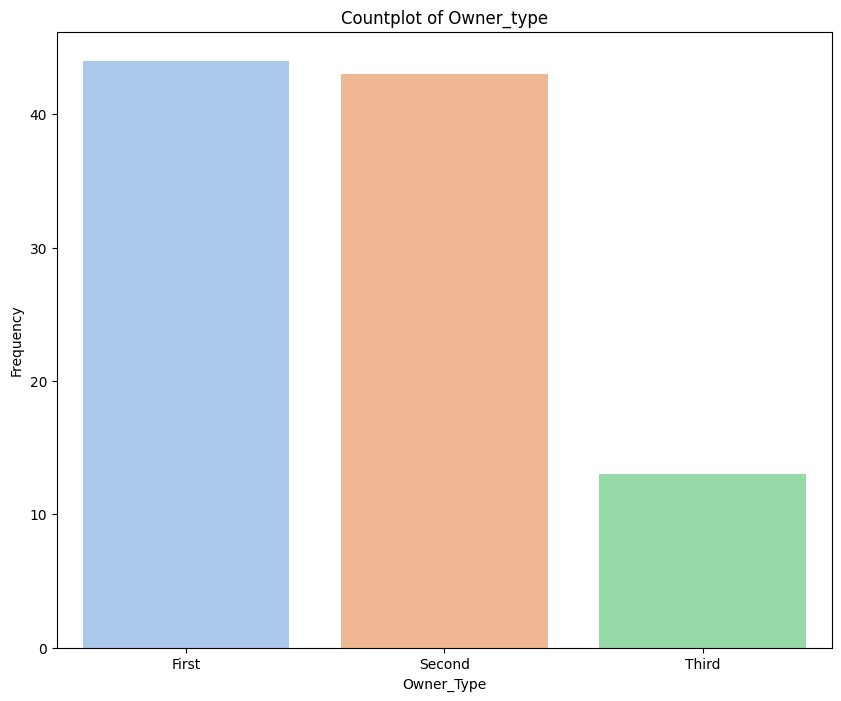

In [ ]:
# Plotting countplots for categorical columns
for col in categorical_columns:
    if col == 'Model':  # Skip Model to avoid too many categories
        continue
    else:
        plt.figure(figsize=(10, 8))
        sns.countplot(x=col, data=df, palette='pastel')  # Plotting count of each category
        plt.title(f'Countplot of {col.capitalize()}')  # Setting title
        plt.xlabel(col)  # Setting x-axis label
        plt.ylabel('Frequency')  # Setting y-axis label
        plt.show()  # Display the plot

Observation: Brands like Toyota, Ford, and Hyundai have the highest counts,
whereas Mahindra has the lowest. The dataset contains more automatic cars than manual ones,
and third-owner cars are relatively fewer.






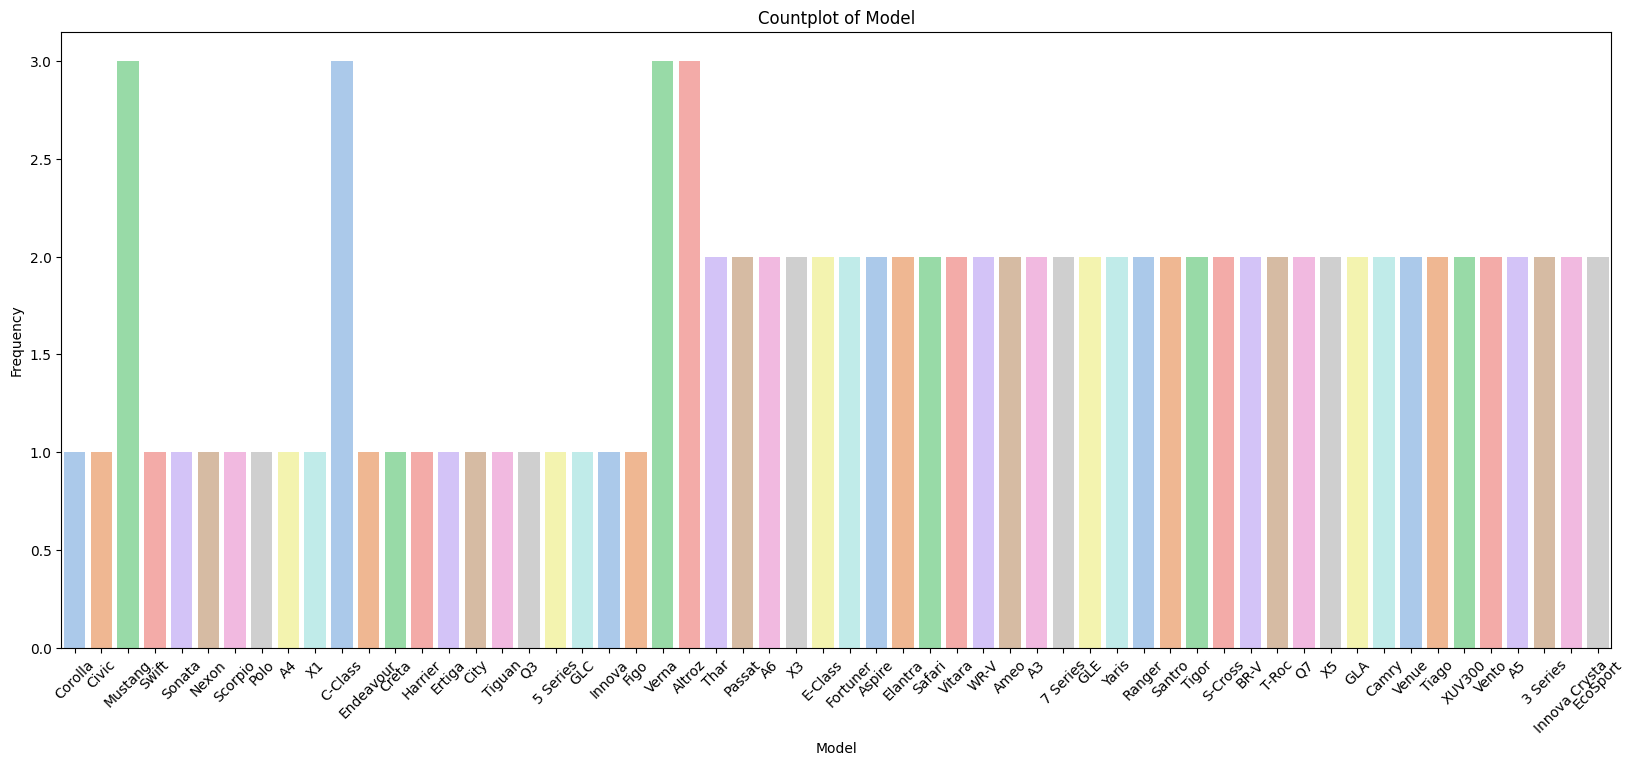

In [ ]:
# Countplot for Model column
plt.figure(figsize=(20, 8))
sns.countplot(x='Model', data=df, palette='pastel')  # Countplot for car models
plt.title('Countplot of Model')  # Title of the plot
plt.xlabel('Model')  # Label for x-axis
plt.xticks(rotation=45)  # Rotating the x-axis labels to avoid overlap
plt.ylabel('Frequency')  # Label for y-axis
plt.show()

###Outlier Analysis

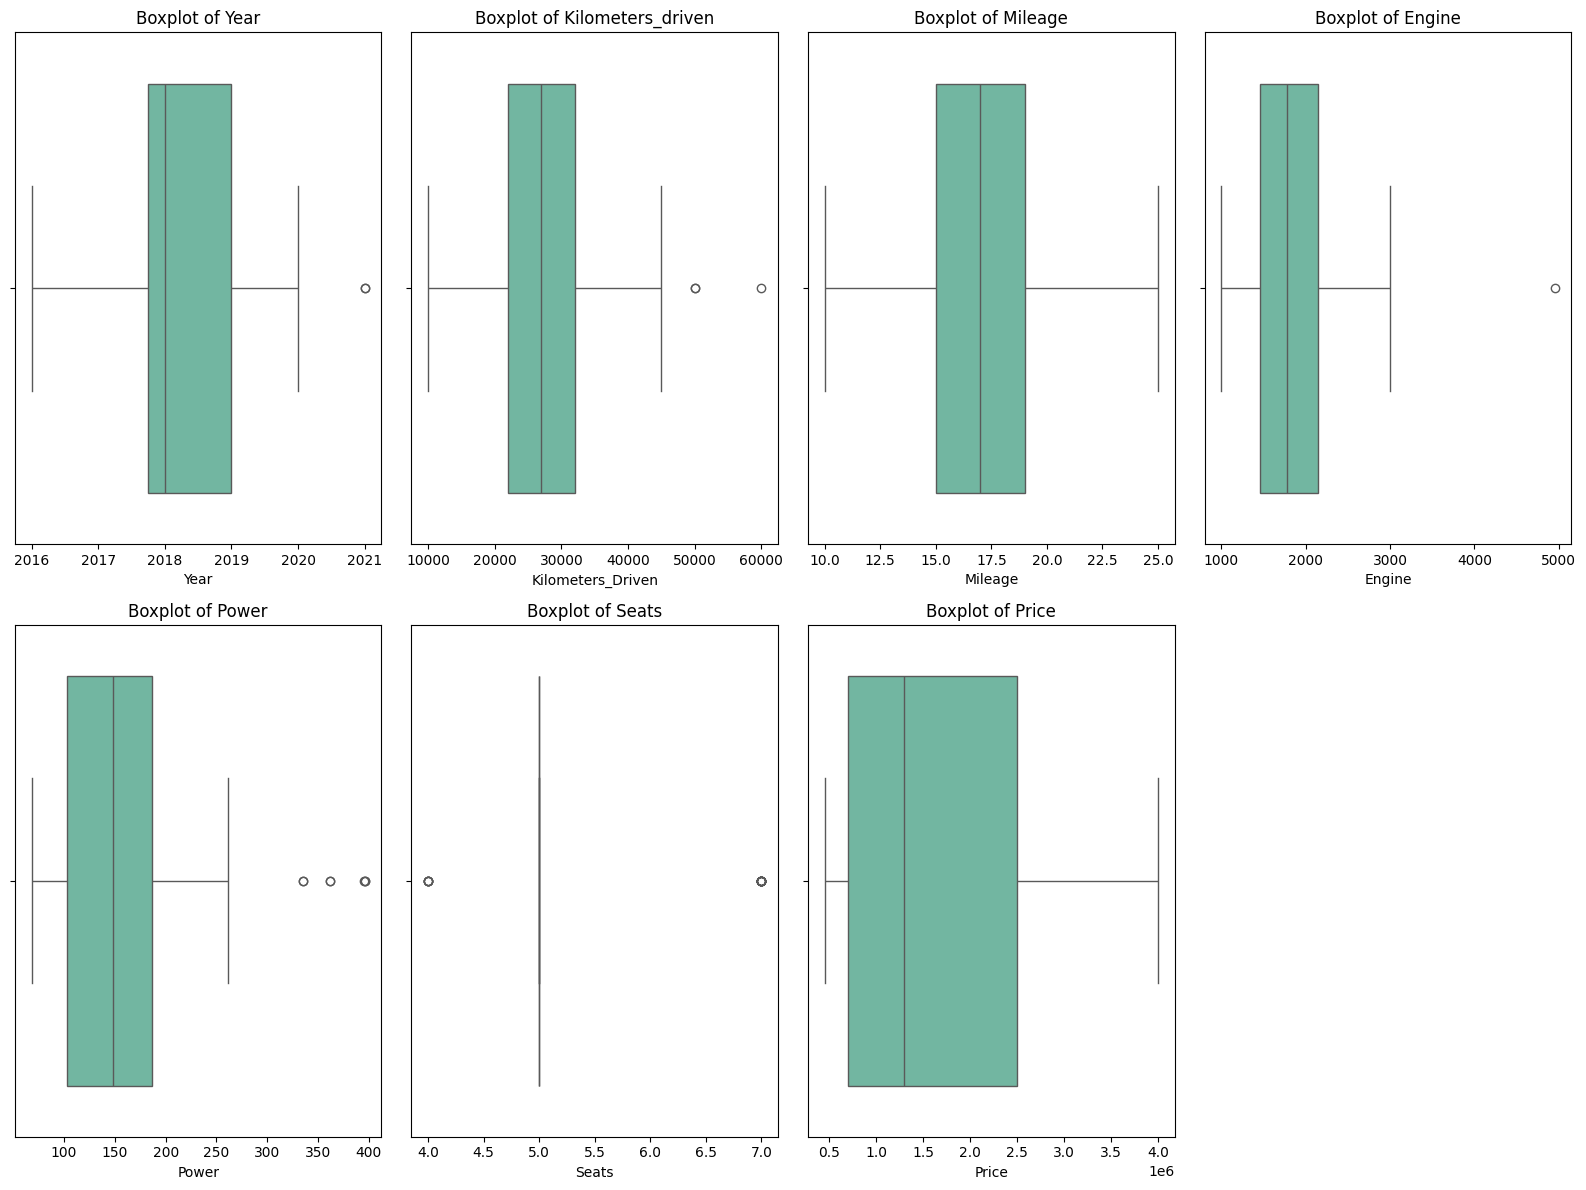

In [ ]:
# Plotting boxplots to detect outliers in numerical features
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)  # Creating a grid of subplots
    sns.boxplot(x=df[column], palette='Set2')  # Plotting boxplot for each numerical feature
    plt.title(f'Boxplot of {column.capitalize()}')  # Setting title for each boxplot
plt.tight_layout()  # Adjusting layout for better spacing
plt.show()

Observation:
- Features like Mileage and Price do not have significant outliers.
- Year has a single outlier (2021), but it should not be removed.
- Other features such as Kilometers, Engine, Power, and Seats have some outliers that should not be removed.








###Bivariate Analysis

Target vs Numerical Columns

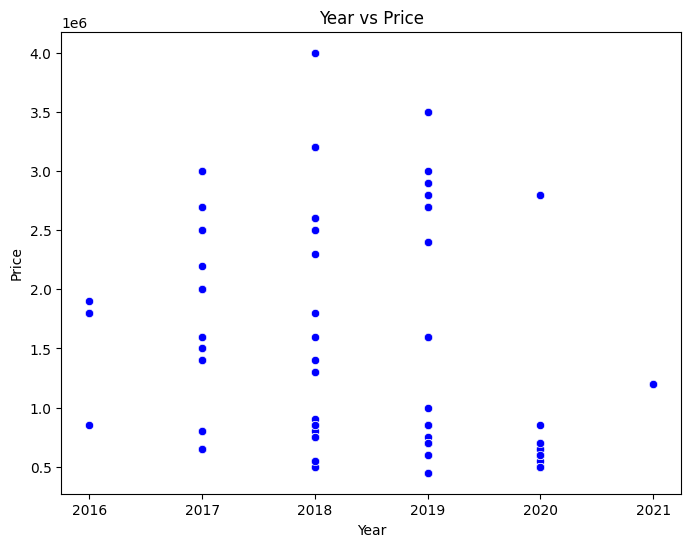

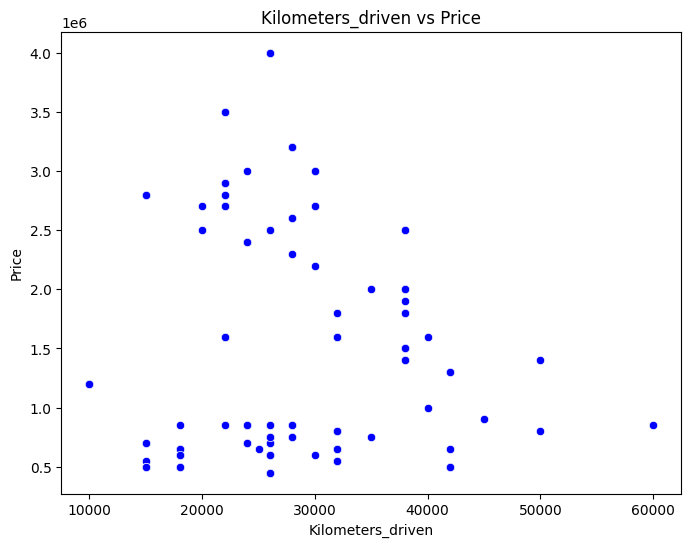

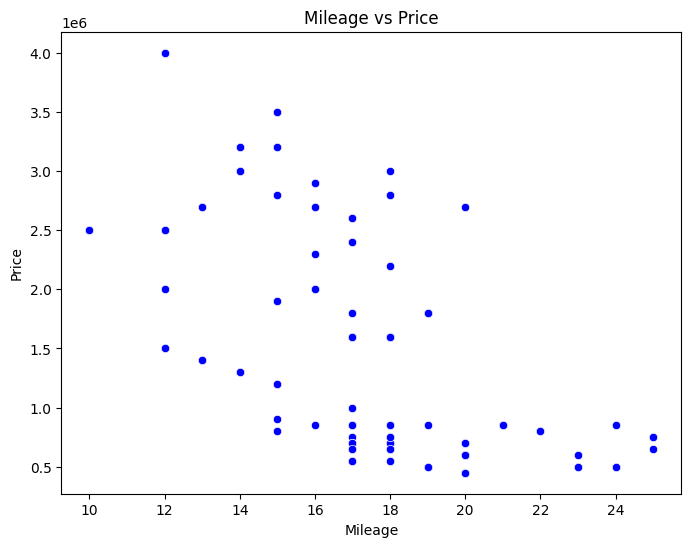

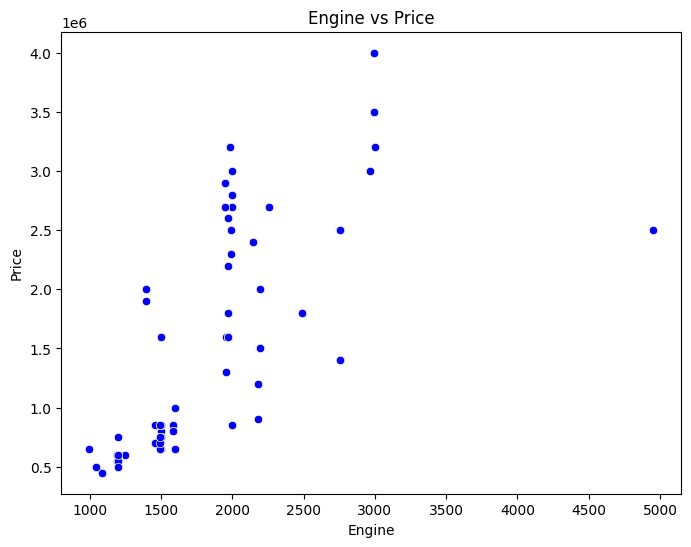

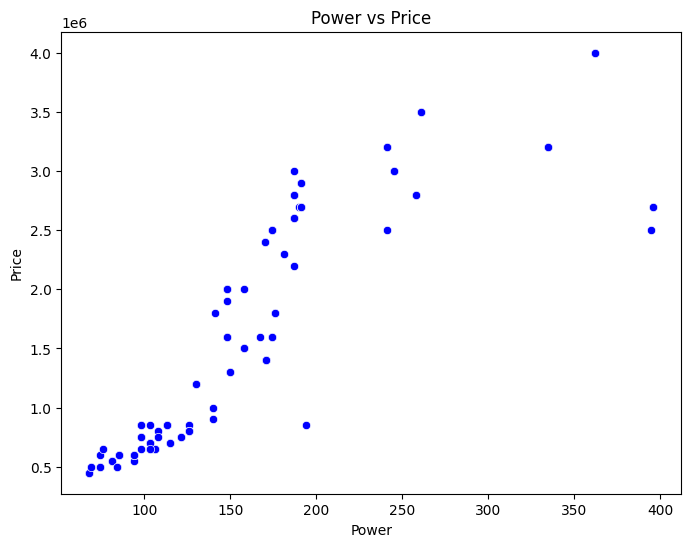

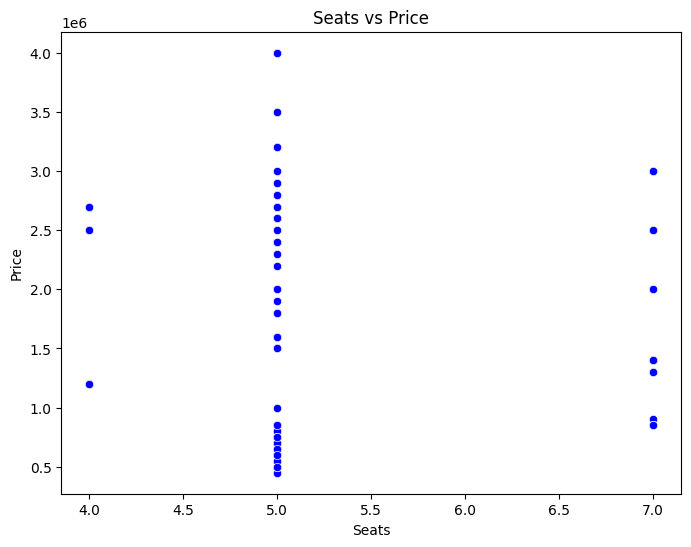

In [ ]:
# Bivariate analysis: Plotting scatterplots for numerical columns vs. Price
for col in numerical_columns[:-1]:  # Excluding 'Price' column
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['Price'], color='blue')  # Scatter plot for each numerical feature vs. price
    plt.title(f'{col.capitalize()} vs Price')  # Setting the title of the plot
    plt.xlabel(col.capitalize())  # Label for x-axis
    plt.ylabel('Price')  # Label for y-axis
    plt.show()


# Observation:
 - Engine and Power show a positive correlation with Price, while Mileage shows high variability.



Target vs Categorical Values

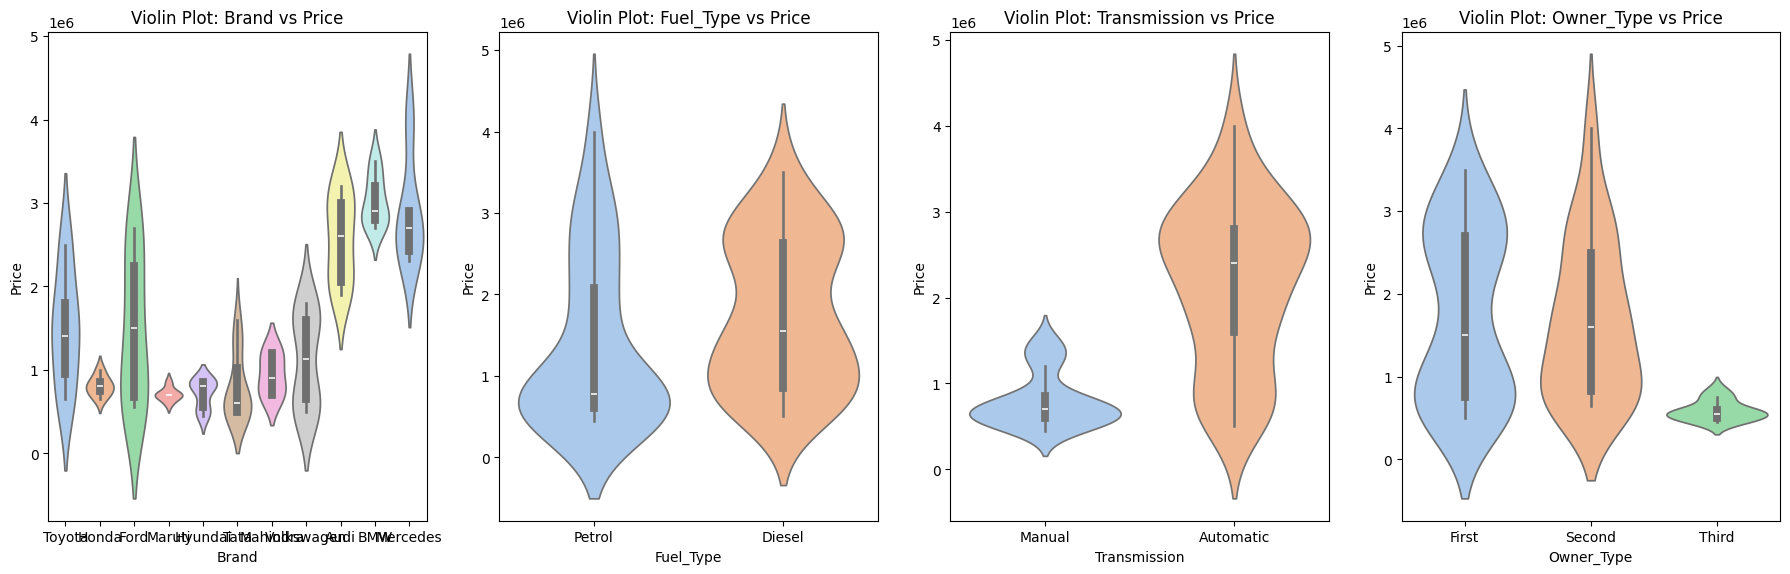

In [ ]:
# Bivariate analysis: Plotting violin plots for categorical columns vs. Price
# Exclude 'Model' column from categorical columns for analysis
categorical_columns = [col for col in categorical_columns if col != 'Model']

# Set up the figure for subplots
plt.figure(figsize=(18, 6))

# Loop over categorical columns to create violin plots
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)  # Adjusting number of subplots dynamically
    sns.violinplot(x=col, y='Price', data=df, palette='pastel')  # Violin plot for each categorical feature vs. price
    plt.title(f'Violin Plot: {col} vs Price')  # Title for each plot
    plt.xlabel(col)  # Label for x-axis
    plt.ylabel('Price')  # Label for y-axis

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



# Observation:
 - Cars with "First" and "Second" owners show higher and more varied prices,while "Third" owner cars have a narrower and lower price range.
 - Automatic transmission cars typically have higher prices compared to manual cars.



###PairPlot

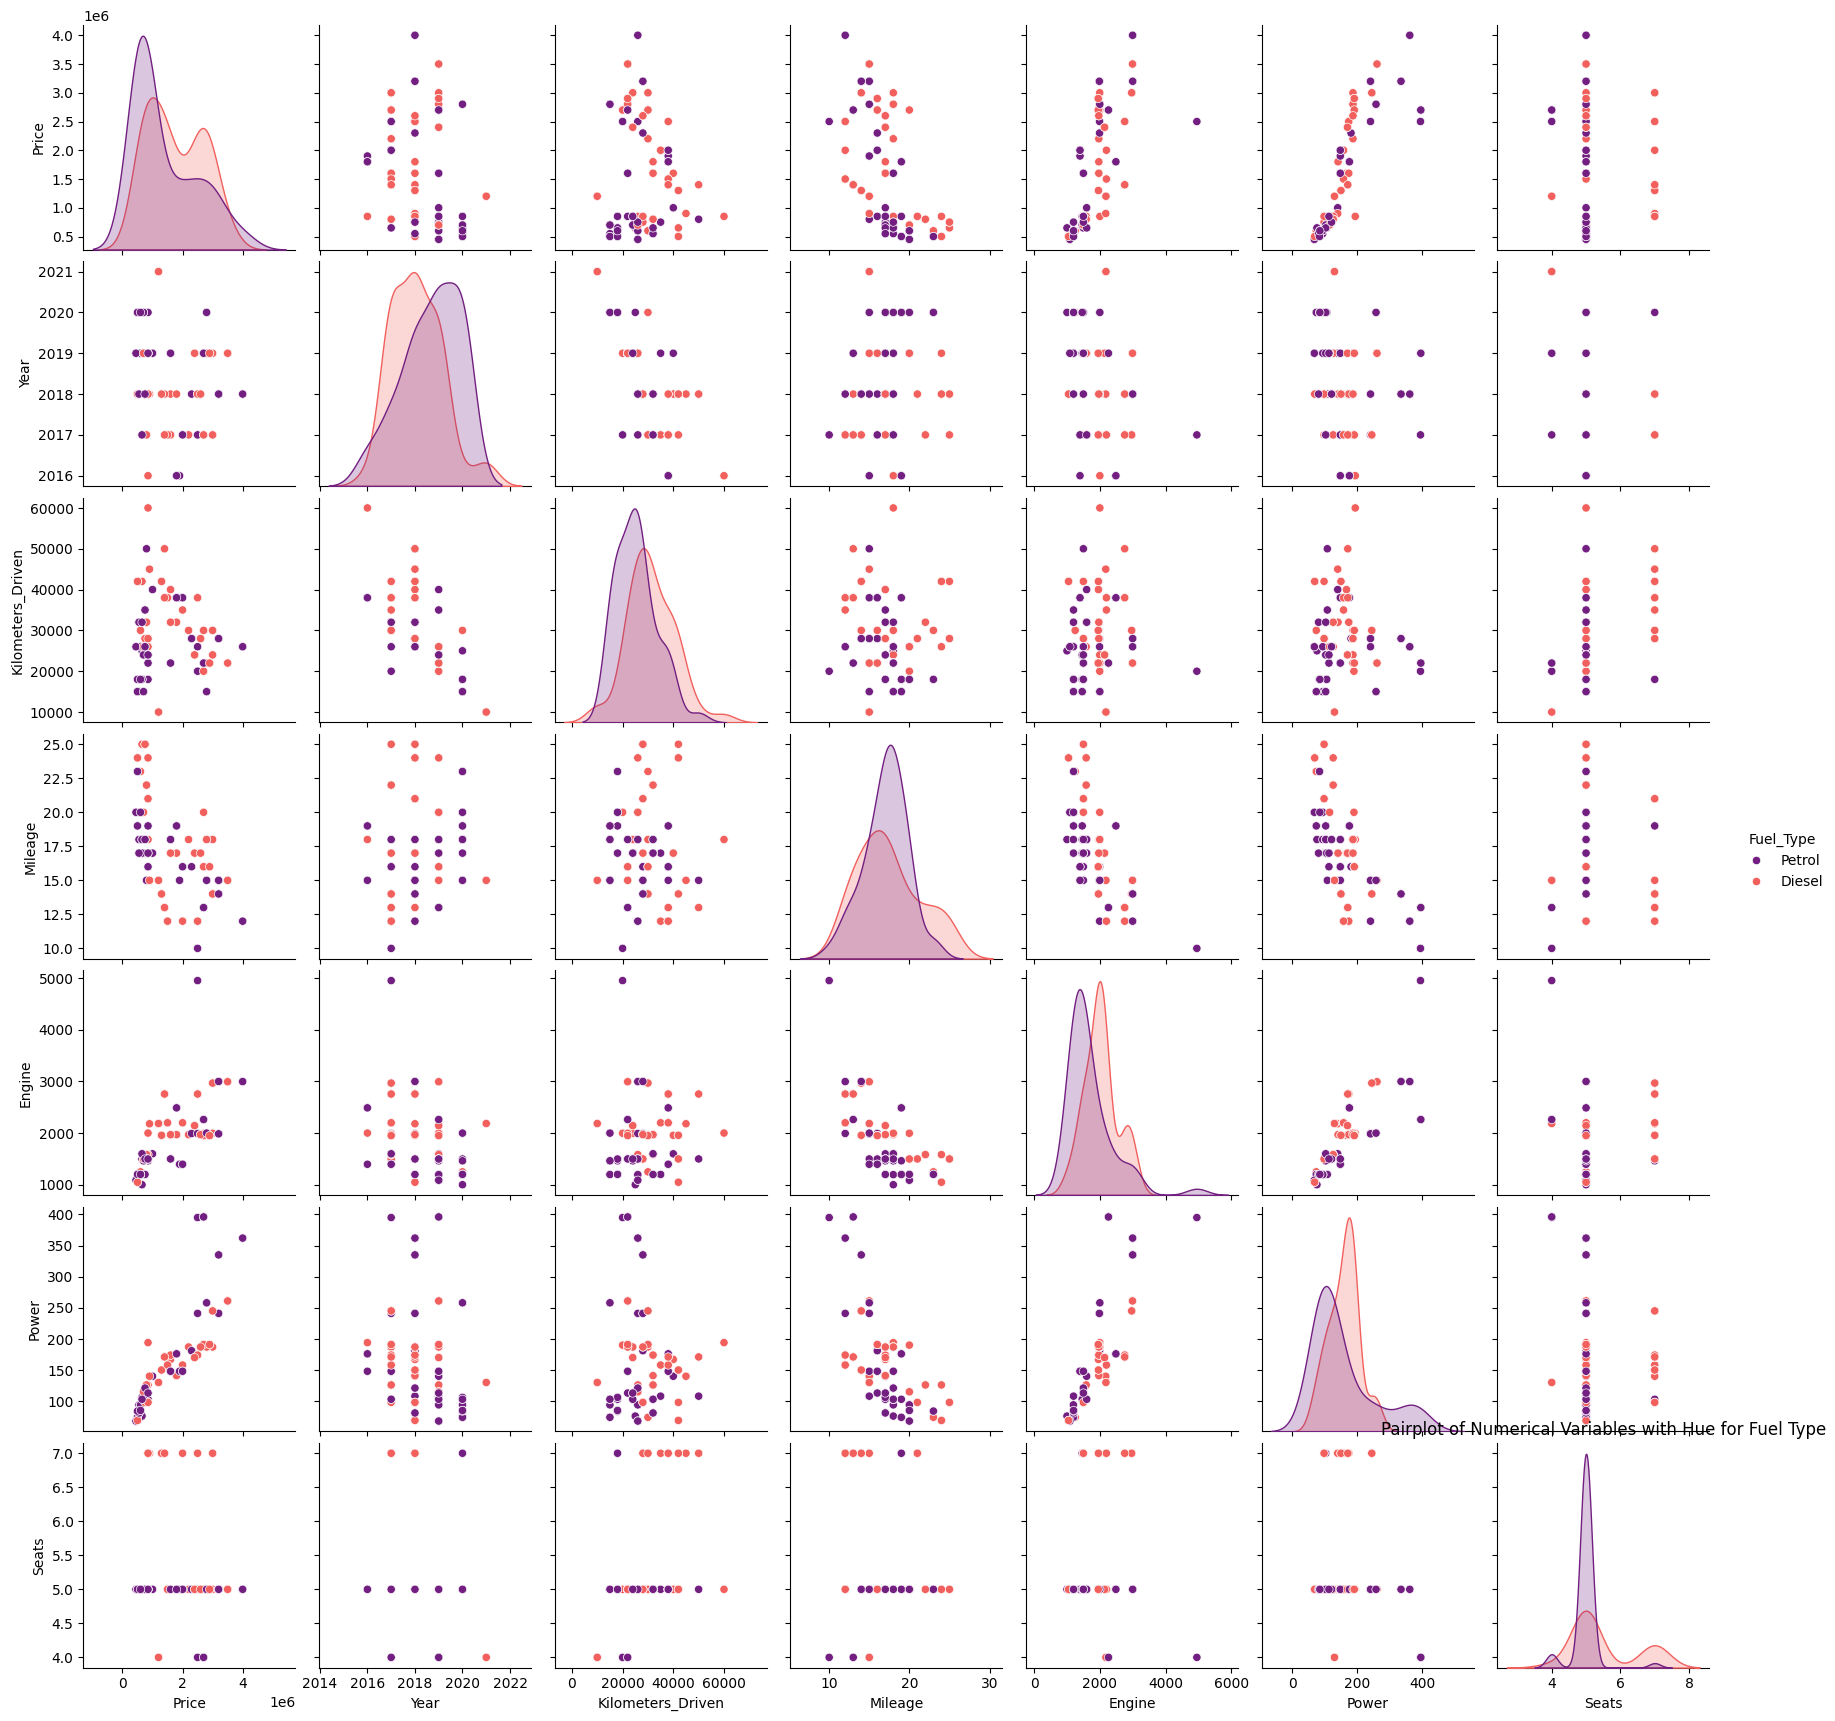

In [ ]:
# Pairplot to visualize relationships between numerical columns, color-coded by Fuel_Type
columns_to_include = ['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type']
sns.pairplot(df[columns_to_include], hue='Fuel_Type', palette='magma')  # Pairplot for numerical variables with fuel type as hue
plt.title('Pairplot of Numerical Variables with Hue for Fuel Type')  # Title for the pairplot
plt.show()

###Correlation Analysis

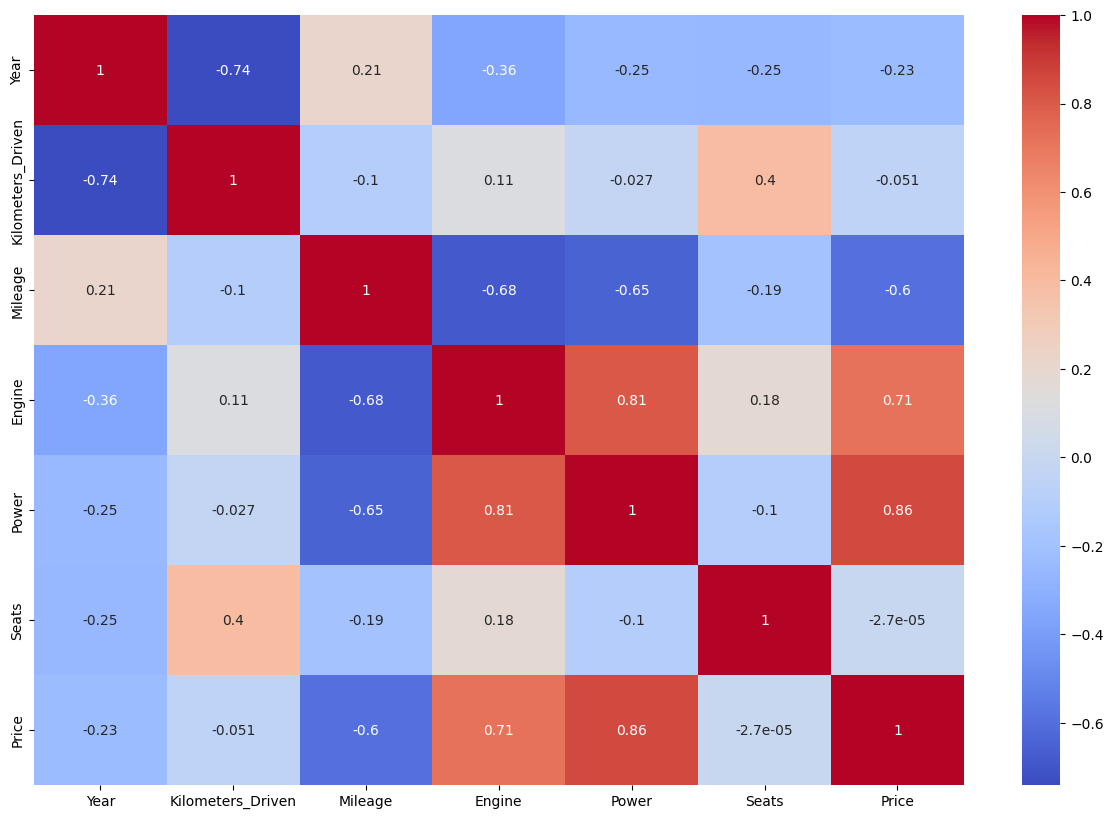

In [ ]:
# Correlation heatmap to visualize correlation between numerical columns
num_cols = df.select_dtypes(exclude='object').columns  # Selecting numerical columns
corr = df[num_cols].corr()  # Calculating correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')  # Plotting the heatmap
plt.show()

# Observation:
 - Price has strong correlations with Engine (0.71) and Power (0.86).
 - Mileage shows negative correlation with Engine and Power, indicating that higher performance tends to reduce fuel efficiency.






###Models


--- Linear Regression ---
Linear Regression - Root Mean Squared Error (RMSE): 467450.77004571503
Linear Regression - R-squared: 0.7328235955048823


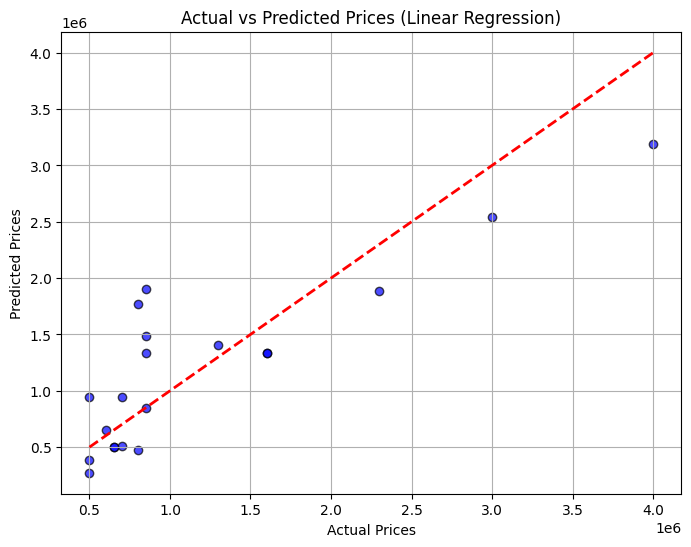


--- Random Forest ---
Random Forest - Root Mean Squared Error (RMSE): 371443.88876383466
Random Forest - R-squared: 0.83130089564101


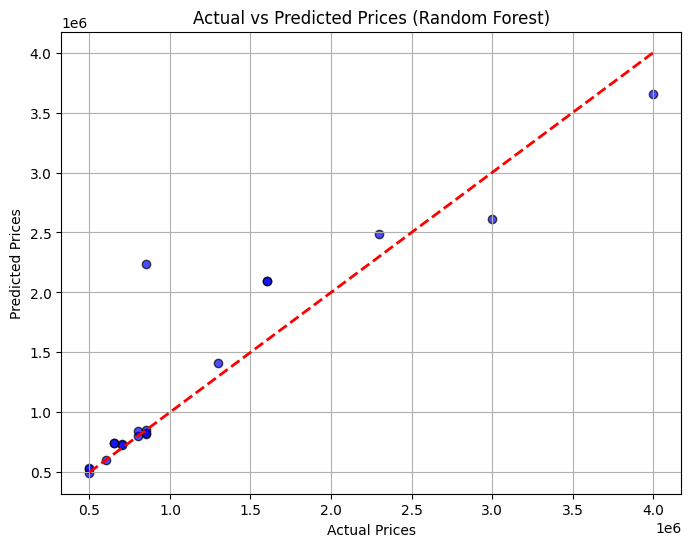


--- Decision Tree Regressor ---
Decision Tree - Root Mean Squared Error (RMSE): 454285.15273999434
Decision Tree - R-squared: 0.747661551629272


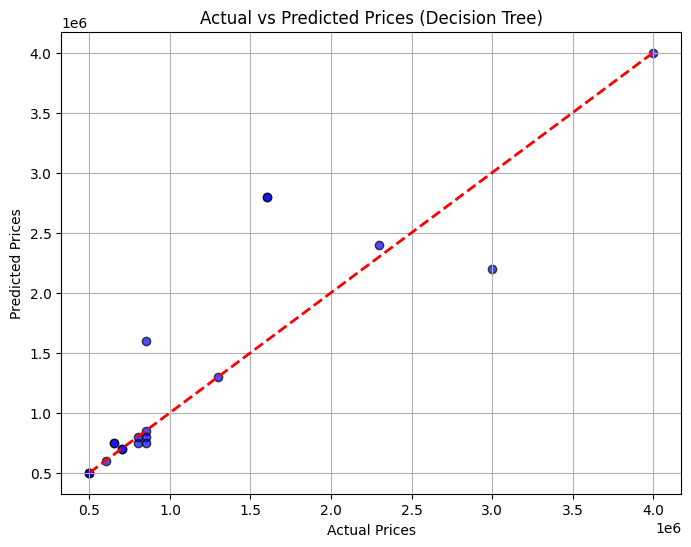


--- XGBoost Regressor ---
XGBoost - Root Mean Squared Error (RMSE): 300689.8410959393
XGBoost - R-squared: 0.8894487023353577


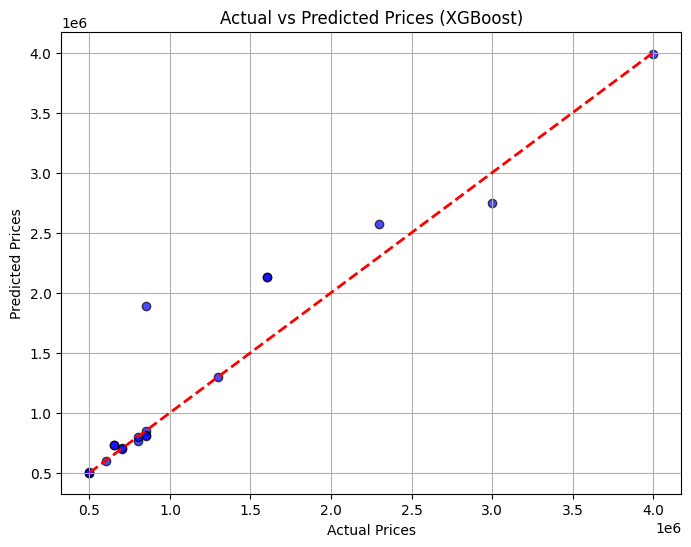

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


# Encoding categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Brand'] = label_encoder.fit_transform(df['Brand'])  # Encoding 'Brand' column
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])  # Encoding 'Fuel_Type' column
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])  # Encoding 'Transmission' column
df['Model'] = label_encoder.fit_transform(df['Model'])  # Encoding 'Model' column

# Ordinal encoding for "Owner_Type"
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
df['Owner_Type'] = ordinal_encoder.fit_transform(df[['Owner_Type']])  # Encoding 'Owner_Type' column

# Splitting data into features (X) and target (y)
X = df.drop(['Price'], axis=1)  # Dropping 'Price' column from features
y = df['Price']  # Setting 'Price' as the target variable

# Standardizing numerical columns for better performance in certain models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])  # Standardizing numerical columns

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot Actual vs Predicted prices
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')  # Scatter plot
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line (y = x)
    plt.title(f'Actual vs Predicted Prices ({model_name})')  # Title for the plot
    plt.xlabel('Actual Prices')  # X-axis label
    plt.ylabel('Predicted Prices')  # Y-axis label
    plt.grid(True)  # Enable grid for better readability
    plt.show()  # Display the plot

# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (ensure you have df, X_train, y_train, X_test, and y_test defined)
# Assuming df is already loaded and prepared for training/testing

# 5. Function to plot Actual vs Predicted prices
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')  # Scatter plot
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line (y = x)
    plt.title(f'Actual vs Predicted Prices ({model_name})')  # Title for the plot
    plt.xlabel('Actual Prices')  # X-axis label
    plt.ylabel('Predicted Prices')  # Y-axis label
    plt.grid(True)  # Enable grid for better readability
    plt.show()  # Display the plot

# Assuming X_train, y_train, X_test, y_test are already split from the dataframe

# Model 1: Linear Regression
print("\n--- Linear Regression ---")
linear_model = LinearRegression()  # Initialize Linear Regression model
linear_model.fit(X_train, y_train)  # Train the model on the training data

# Predictions and evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test)  # Predict on the test data
mse_linear = mean_squared_error(y_test, y_pred_linear)  # Mean Squared Error
r2_linear = r2_score(y_test, y_pred_linear)  # R-squared

print(f"Linear Regression - Root Mean Squared Error (RMSE): {mse_linear**0.5}")  # Print RMSE
print(f"Linear Regression - R-squared: {r2_linear}")  # Print R-squared

# Plot Actual vs Predicted for Linear Regression
plot_actual_vs_predicted(y_test, y_pred_linear, "Linear Regression")

# Model 2: Random Forest
print("\n--- Random Forest ---")
random_forest_model = RandomForestRegressor(random_state=42)  # Initialize Random Forest model
random_forest_model.fit(X_train, y_train)  # Train the model on the training data

# Predictions and evaluation for Random Forest
y_pred_rf = random_forest_model.predict(X_test)  # Predict on the test data
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)  # R-squared

print(f"Random Forest - Root Mean Squared Error (RMSE): {mse_rf**0.5}")  # Print RMSE
print(f"Random Forest - R-squared: {r2_rf}")  # Print R-squared

# Plot Actual vs Predicted for Random Forest
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest")

# Model 3: Decision Tree Regressor
print("\n--- Decision Tree Regressor ---")
decision_tree_model = DecisionTreeRegressor(random_state=42)  # Initialize Decision Tree model
decision_tree_model.fit(X_train, y_train)  # Train the model on the training data

# Predictions and evaluation for Decision Tree
y_pred_tree = decision_tree_model.predict(X_test)  # Predict on the test data
mse_tree = mean_squared_error(y_test, y_pred_tree)  # Mean Squared Error
r2_tree = r2_score(y_test, y_pred_tree)  # R-squared

print(f"Decision Tree - Root Mean Squared Error (RMSE): {mse_tree**0.5}")  # Print RMSE
print(f"Decision Tree - R-squared: {r2_tree}")  # Print R-squared

# Plot Actual vs Predicted for Decision Tree
plot_actual_vs_predicted(y_test, y_pred_tree, "Decision Tree")

# Model 4: XGBoost Regressor
print("\n--- XGBoost Regressor ---")
xgboost_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)  # Initialize XGBoost model
xgboost_model.fit(X_train, y_train)  # Train the model on the training data

# Predictions and evaluation for XGBoost
y_pred_xgb = xgboost_model.predict(X_test)  # Predict on the test data
mse_xgb = mean_squared_error(y_test, y_pred_xgb)  # Mean Squared Error
r2_xgb = r2_score(y_test, y_pred_xgb)  # R-squared

print(f"XGBoost - Root Mean Squared Error (RMSE): {mse_xgb**0.5}")  # Print RMSE
print(f"XGBoost - R-squared: {r2_xgb}")  # Print R-squared

# Plot Actual vs Predicted for XGBoost
plot_actual_vs_predicted(y_test, y_pred_xgb, "XGBoost")

### Conclusion based on Model Performance:

Based on the evaluation of four regression models (Linear Regression, Random Forest, Decision Tree, and XGBoost) for predicting the target variable (Price), we can draw the following conclusions:

1. **Linear Regression**:
   - **RMSE**: 467,450.77
   - **R-squared**: 0.73
   - Linear Regression has a relatively high RMSE compared to other models, indicating that its predictions are farther from the actual prices. However, it still explains about **73%** of the variance in the target variable (Price), which is a reasonable performance for a simpler model.

2. **Random Forest**:
   - **RMSE**: 371,443.89
   - **R-squared**: 0.83
   - Random Forest performs better than Linear Regression, with a **lower RMSE** and a significantly **higher R-squared** of **0.83**. This suggests that the model can explain about **83%** of the variance in the target, which indicates better predictive power and more accurate results compared to Linear Regression.

3. **Decision Tree Regressor**:
   - **RMSE**: 454,285.15
   - **R-squared**: 0.75
   - The Decision Tree Regressor shows an RMSE slightly better than Linear Regression but worse than Random Forest. With an **R-squared of 0.75**, it explains **75%** of the variance, meaning it performs moderately well but is prone to overfitting in some cases, which may be why its performance is not as strong as Random Forest.

4. **XGBoost Regressor**:
   - **RMSE**: 300,689.84
   - **R-squared**: 0.89
   - XGBoost stands out as the best-performing model. It has the **lowest RMSE** and the **highest R-squared** of **0.89**, meaning it explains **89%** of the variance in the target variable. This indicates that XGBoost is the most accurate model among those evaluated, providing the best predictions for the dataset.

### Key Insights:
- **XGBoost** is the most effective model for this regression problem, offering the best balance between prediction accuracy and model fit.
- **Random Forest** also performs very well with an **R-squared of 0.83**, outperforming both Linear Regression and Decision Tree models.
- While **Linear Regression** and **Decision Tree Regressor** are less accurate, they are still valid models, especially for simpler tasks or if computational efficiency is a priority.
- The **RMSE** values indicate that XGBoost is significantly more accurate than the other models in predicting the prices, as it has the smallest error compared to actual prices.

### Recommendations:
- **XGBoost** should be considered the final model for deployment due to its superior performance.
- If computational efficiency or interpretability is important, **Random Forest** may be a good alternative.
- **Linear Regression** and **Decision Tree** models may serve as benchmarks or be considered for smaller datasets or simpler implementations.

This analysis suggests that more advanced models, particularly **XGBoost**, should be preferred for tasks that require the most accurate predictions.